In [1]:
import numpy as np
#定义环境
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # 初始位置
        self.goal = (size - 1, size - 1)  # 目标位置
        self.actions = ['up', 'down', 'left', 'right']
        self.action_map = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        move = self.action_map[action]
        next_state = (self.state[0] + move[0], self.state[1] + move[1])

        if 0 <= next_state[0] < self.size and 0 <= next_state[1] < self.size:
            self.state = next_state
        else:
            next_state = self.state

        reward = 1 if next_state == self.goal else -0.1
        done = next_state == self.goal
        return next_state, reward, done

    def render(self):
        grid = np.zeros((self.size, self.size))
        grid[self.state] = 1
        grid[self.goal] = 0.5
        print(grid)


In [2]:
import random
#基于Q-learing的智能体
class QLearningAgent:
    def __init__(self, actions, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.99):
        self.actions = actions
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.epsilon_decay = exploration_decay
        self.q_table = {}

    def get_q(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.actions)
        q_values = [self.get_q(state, action) for action in self.actions]
        max_q = max(q_values)
        return self.actions[q_values.index(max_q)]

    def learn(self, state, action, reward, next_state):
        old_q = self.get_q(state, action)
        next_max_q = max([self.get_q(next_state, a) for a in self.actions])
        new_q = (1 - self.lr) * old_q + self.lr * (reward + self.gamma * next_max_q)
        self.q_table[(state, action)] = new_q

    def update_epsilon(self):
        self.epsilon *= self.epsilon_decay


In [3]:
#智能体训练
env = GridWorld()
agent = QLearningAgent(actions=env.actions)

num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward

    agent.update_epsilon()
    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")

# 最后可以渲染一下环境，查看智能体的表现
env.reset()
env.render()


Episode 0: Total Reward: -0.6000000000000003
Episode 100: Total Reward: 0.10000000000000009
Episode 200: Total Reward: 0.10000000000000009
Episode 300: Total Reward: 0.10000000000000009
Episode 400: Total Reward: 0.30000000000000004
Episode 500: Total Reward: 0.30000000000000004
Episode 600: Total Reward: 0.30000000000000004
Episode 700: Total Reward: 0.30000000000000004
Episode 800: Total Reward: 0.30000000000000004
Episode 900: Total Reward: 0.30000000000000004
[[1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5]]


Episode 0: Total Reward: -1.8000000000000012
Episode 100: Total Reward: -0.7000000000000004
Episode 200: Total Reward: -0.09999999999999987
Episode 300: Total Reward: 0.30000000000000004
Episode 400: Total Reward: 0.30000000000000004
Episode 500: Total Reward: 0.30000000000000004
Episode 600: Total Reward: 0.30000000000000004
Episode 700: Total Reward: 0.30000000000000004
Episode 800: Total Reward: 0.30000000000000004
Episode 900: Total Reward: 0.30000000000000004


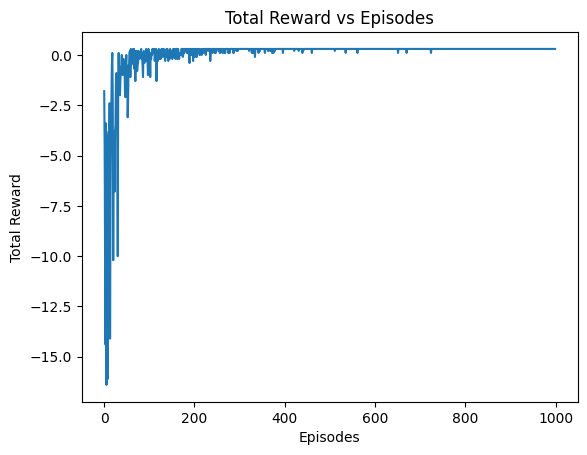

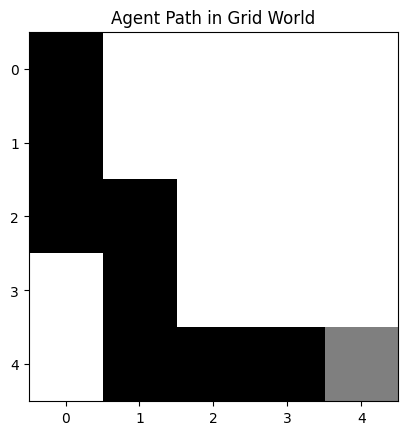

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 定义网格世界环境
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)  # 初始位置
        self.goal = (size - 1, size - 1)  # 目标位置
        self.actions = ['up', 'down', 'left', 'right']
        self.action_map = {
            'up': (-1, 0),
            'down': (1, 0),
            'left': (0, -1),
            'right': (0, 1)
        }

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        move = self.action_map[action]
        next_state = (self.state[0] + move[0], self.state[1] + move[1])

        if 0 <= next_state[0] < self.size and 0 <= next_state[1] < self.size:
            self.state = next_state
        else:
            next_state = self.state

        reward = 1 if next_state == self.goal else -0.1
        done = next_state == self.goal
        return next_state, reward, done

    def render(self):
        grid = np.zeros((self.size, self.size))
        grid[self.state] = 1
        grid[self.goal] = 0.5
        print(grid)

# 定义Q-learning智能体
class QLearningAgent:
    def __init__(self, actions, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.99):
        self.actions = actions
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_rate
        self.epsilon_decay = exploration_decay
        self.q_table = {}

    def get_q(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(self.actions)
        q_values = [self.get_q(state, action) for action in self.actions]
        max_q = max(q_values)
        return self.actions[q_values.index(max_q)]

    def learn(self, state, action, reward, next_state):
        old_q = self.get_q(state, action)
        next_max_q = max([self.get_q(next_state, a) for a in self.actions])
        new_q = (1 - self.lr) * old_q + self.lr * (reward + self.gamma * next_max_q)
        self.q_table[(state, action)] = new_q

    def update_epsilon(self):
        self.epsilon *= self.epsilon_decay

# 训练和可视化
env = GridWorld()
agent = QLearningAgent(actions=env.actions)

num_episodes = 1000
reward_list = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state
        total_reward += reward

    agent.update_epsilon()
    reward_list.append(total_reward)
    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward: {total_reward}")

# 绘制训练奖励变化
plt.plot(range(num_episodes), reward_list)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Episodes')
plt.show()

# 可视化智能体在环境中的路径
state = env.reset()
path = [state]
done = False

while not done:
    action = agent.choose_action(state)
    next_state, _, done = env.step(action)
    path.append(next_state)
    state = next_state

grid = np.zeros((env.size, env.size))
for s in path:
    grid[s] = 1
grid[env.goal] = 0.5

plt.imshow(grid, cmap='gray_r')
plt.title('Agent Path in Grid World')
plt.show()
